### Part 0: Jupyter notebooks in a nutshell
* You are reading this line in a jupyter notebook.
* A notebook consists of cells. A cell can contain either code or hypertext. 
    * This cell contains hypertext. The next cell contains code.
* You can __run a cell__ with code by selecting it (click) and pressing `Ctrl + Enter` to execute the code and display output (if any).
* Behind the curtains, there's a python interpreter that runs that code and remembers anything you defined.

* `Ctrl + S` to save changes (or use the button that looks like a floppy disk)
* Top menu -> Kernel -> Interrupt (or Stop button) if you want it to stop running cell midway.
* Top menu -> Kernel -> Restart (or cyclic arrow button) if interrupt doesn't fix the problem (you will lose all variables).
* To find shortcuts: Top menu -> Help -> Keyboard Shortcuts


* More: [Hacker's guide](http://arogozhnikov.github.io/2016/09/10/jupyter-features.html), [Beginner's guide'](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/), [Datacamp tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

Now __a very useful feature__ of jupyter notebooks: 
* if you're typing something, press `Tab` to see automatic suggestions, use arrow keys + enter to pick one.
* if you move your cursor inside some function and press `Shift + Tab`, you'll get a help window. `Shift + (Tab , Tab)` will expand it.

### Part 1: Decision trees & model selection

![img](https://pbs.twimg.com/media/B13n2VVCIAA0hJS.jpg)

In [1]:
import numpy as np

In [2]:
toy_data = np.load('/xdata/eparrish/mlhep2018/datasets/data.npz')
X, y = toy_data['X'], toy_data['y']
print(X.shape, y.shape)

(4505, 2) (4505,)


In [3]:
# To save training time only 50% of the loaded data is used for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, shuffle=True)

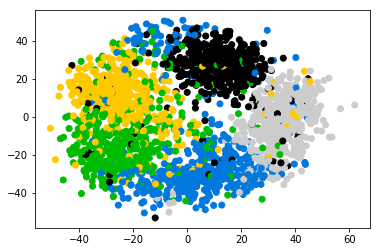

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='nipy_spectral');

# Decision trees out of the box

DecisionTreeClassifier has a number of parameters:
* max_depth : a limit on tree depth (default : no limit)
* min_samples_split : there should be at least this many samples to split further (default : 2)
* min_samples_leaf : there should be at least this many samples on one side of a split to consider it valid (default : 1).
* criterion : 'giny' or 'entropy' - split stuff over this parameter (default : giny)

In [5]:
from sklearn.tree import DecisionTreeClassifier

### Plot decision surface

This function takes your classifier and plots it's prediction at each point. Let's see how it works.

(this only works for two dimensions)

In [6]:
from sklearn.metrics import accuracy_score
def plot_decision_surface(clf, X, y, plot_step = 0.2, cmap='nipy_spectral', figsize=(12,8)):
    """Plot the decision boundary of clf on X and y, visualize training points"""
    plt.figure(figsize=figsize)
    x0_grid, x1_grid = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, plot_step),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, plot_step))
    y_pred_grid = clf.predict(np.stack([x0_grid.ravel(), x1_grid.ravel()],axis=1)).reshape(x1_grid.shape)
    plt.contourf(x0_grid, x1_grid, y_pred_grid, cmap=cmap, alpha=0.5)  
    y_pred = clf.predict(X)    
    plt.scatter(*X[y_pred==y].T,c = y[y_pred==y],
                marker='.',cmap=cmap,alpha=0.5,label='correct')
    plt.scatter(*X[y_pred!=y].T,c = y[y_pred!=y],
                marker='x',cmap=cmap,s=50,label='errors')
    plt.legend(loc='best')
    print("Accuracy = ",accuracy_score(y, y_pred))
    plt.show()

### Train quality

In [48]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=11, random_state=13, max_depth=6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

Accuracy =  0.8246003552397868


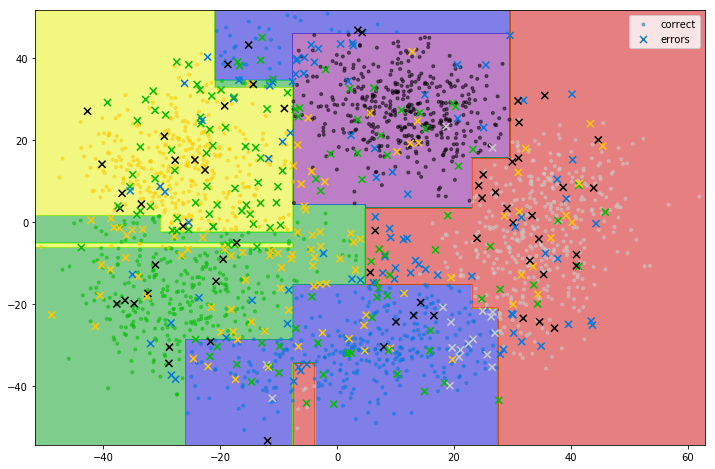

In [49]:
plot_decision_surface(tree, X_train, y_train)


### Using  existing ensembles : Random Forest

RandomForest combines bagging and random subspaces: each tree uses a fraction of training samples and while split in that tree is chosen among a subset of features. This leads to a slightly better performance.

__Note:__ try re-running your code a few times and see what happens to accuracy.

In [10]:
# scikit-learn spams numpy warnings
# if you feel like digging into the scikit-learn/numpy internals, feel free to comment this out
# https://stackoverflow.com/questions/49545947/sklearn-deprecationwarning-truth-value-of-an-array
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Part V (final): machine learning with scikit-learn

<img src='https://imgs.xkcd.com/comics/machine_learning.png' width=320px>

Scikit-learn is _the_ tool for simple machine learning pipelines. 

It's a single library that unites a whole bunch of models under the common interface:
* Create:__ `model = sklearn.whatever.ModelNameHere(parameters_if_any)`__
* Train:__ `model.fit(X,y)`__
* Predict:__ `model.predict(X_test)`__

It also contains utilities for feature extraction, quality estimation or cross-validation.

In [35]:
import pandas as pd
data = pd.read_csv("/xdata/eparrish/mlhep2018/datasets/titanic.csv", index_col='PassengerId') # this yields a pandas.DataFrame"
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Name - a string with person's full name
* Sex - a person's gender (in those good ol' times when there were just 2 of them)
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [45]:
from sklearn.metrics import accuracy_score

features = data[["Fare", "SibSp","Parch","Age"]].copy()
answers = data["Survived"]

model = RandomForestClassifier(n_estimators=100)
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
print("Test accuracy:", accuracy_score(answers[-100:], test_predictions))


print("Feature Importances: %s" %(model.feature_importances_))

Test accuracy: 0.7
Feature Importances: [0.49467987 0.08133146 0.04584061 0.37814806]


Final quest: add more features to achieve accuracy of at least 0.80

__Hint:__ for string features like "Sex" or "Embarked" you will have to compute some kind of numeric representation.
For example, 1 if male and 0 if female or vice versa 

__Hint II:__ you can use `model.feature_importances_` to get a hint on how much did it rely each of your features.

* Sklearn [tutorials](http://scikit-learn.org/stable/tutorial/index.html)
* Sklearn [examples](http://scikit-learn.org/stable/auto_examples/index.html)
* SKlearn [cheat sheet](http://scikit-learn.org/stable/_static/ml_map.png)

In [36]:
sexToBool = {'male':0, 'female':1}
data['Sex'] = data['Sex'].map(sexToBool)

# data['Sex'] = data['Sex'].fillna(value=data['Sex'].mean())

In [46]:
features = data[["Age","Sex","Parch","Fare"]].copy()
answers = data["Survived"]

model = RandomForestClassifier(n_estimators=100)
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
print("Test accuracy:", accuracy_score(answers[-100:], test_predictions))

Test accuracy: 0.84


In [47]:
model.feature_importances_

array([0.28187496, 0.27371179, 0.04397128, 0.40044197])